In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_root = '/content/drive/My Drive/Colab Notebooks/dataset'

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(data_root):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1009.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1003.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1001.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1008.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1006.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1007.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1004.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1000.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1005.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1002.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1015.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1013.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1014.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1019.jpg
/content/drive/My Drive/Colab Notebooks/dataset/pituitary/1018

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [77]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma','meningioma', 'pituitary']
for i in labels:
    folderPath = os.path.join(data_root, i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [78]:
X_train.ndim

4

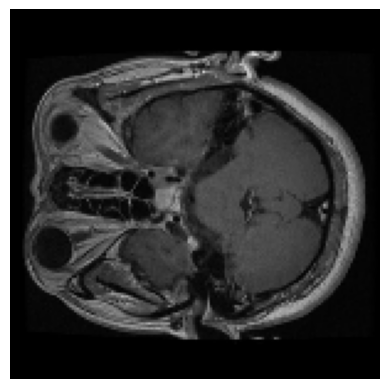

In [79]:
plt.axis('off')
plt.imshow(X_train[3062])

In [80]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2022)
X_train.shape

(3079, 150, 150, 3)

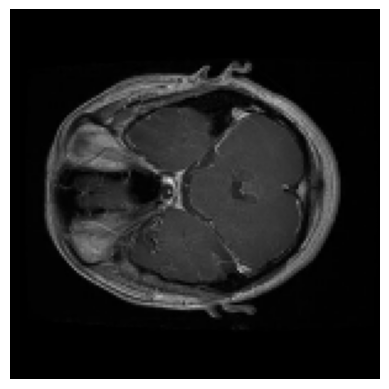

In [81]:
plt.axis('off')
plt.imshow(X_train[3062])

In [82]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 101)

In [84]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [85]:
# Loading the VGG19 model
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [86]:
# Freezing the layers of the VGG19 model
for layer in vgg_model.layers:
    layer.trainable = False

In [87]:
# Create a new model
model = Sequential()

# Add the VGG19 model to the new model
model.add(vgg_model)

In [88]:
# Add custom layers on top of VGG19
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l1(0.001)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l1(0.001)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax', kernel_regularizer = keras.regularizers.l2(0.001)))

In [89]:
# Print the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                

In [90]:
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'],)

In [91]:
history = model.fit(train_datagen.flow(X_train, y_train), validation_data = (X_test, y_test), epochs = 200, validation_split = 0.1)

Epoch 1/200
77/77 [==============================] - 17s 203ms/step - loss: 60.3565 - accuracy: 0.6342 - val_loss: 53.2842 - val_accuracy: 0.7760
Epoch 2/200
77/77 [==============================] - 16s 212ms/step - loss: 49.0152 - accuracy: 0.7467 - val_loss: 44.3698 - val_accuracy: 0.8214
Epoch 3/200
77/77 [==============================] - 15s 199ms/step - loss: 41.3844 - accuracy: 0.7702 - val_loss: 38.1390 - val_accuracy: 0.8604
Epoch 4/200
77/77 [==============================] - 16s 211ms/step - loss: 36.4303 - accuracy: 0.8043 - val_loss: 34.4331 - val_accuracy: 0.8701
Epoch 5/200
77/77 [==============================] - 16s 211ms/step - loss: 33.1274 - accuracy: 0.8348 - val_loss: 31.5664 - val_accuracy: 0.8685
Epoch 6/200
77/77 [==============================] - 15s 200ms/step - loss: 30.4260 - accuracy: 0.8291 - val_loss: 29.0869 - val_accuracy: 0.8831
Epoch 7/200
77/77 [==============================] - 17s 222ms/step - loss: 28.0888 - accuracy: 0.8408 - val_loss: 26.9023 -

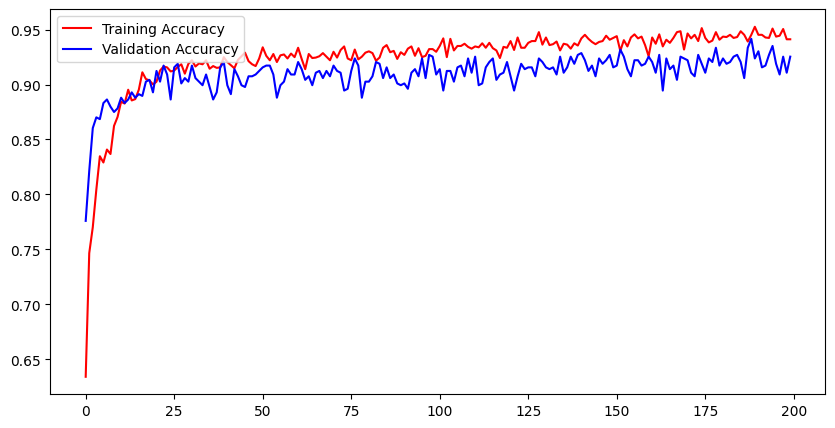

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

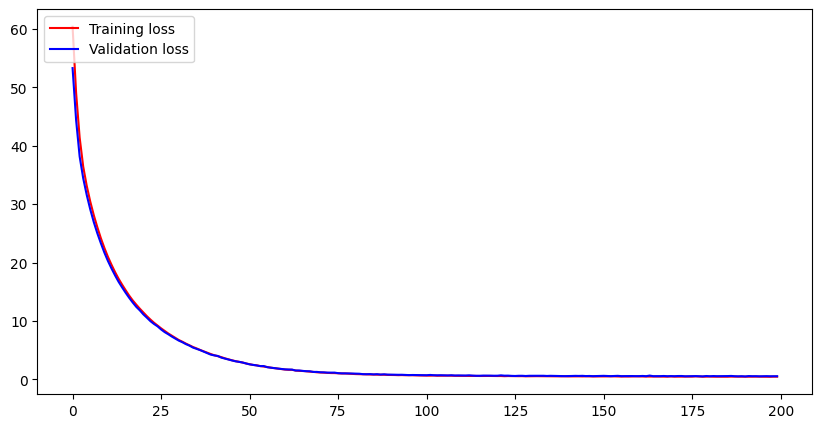

In [93]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,5))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [95]:
y_pred = model.predict(X_test)
y_pred

20/20 [==============================] - 2s 81ms/step


array([[8.2923824e-01, 1.7061132e-01, 1.5042035e-04],
       [4.7702813e-01, 5.2229339e-01, 6.7846809e-04],
       [9.9999452e-01, 4.1314788e-06, 1.2536221e-06],
       ...,
       [6.5024426e-09, 2.8989904e-05, 9.9997103e-01],
       [9.9999547e-01, 1.0524299e-06, 3.4361551e-06],
       [4.4266959e-09, 1.5232702e-06, 9.9999845e-01]], dtype=float32)

In [97]:
a = y_pred[500]
indices = a.argmax()

if indices == 0:
    print('glioma_tumor')
elif indices == 1:
    print('meningioma_tumor')
elif indices == 2:
    print('pituitary_tumor')
else:
    print('Error in predicting the type of tumor')

meningioma_tumor


In [98]:
y_pred_labels = np.argmax(y_pred, axis = 1)
y_pred_labels

array([0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1,
       2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1,
       0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2,
       0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0,
       0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0,
       0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0,
       0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0,

In [100]:
y_test_new[500]

1

In [101]:
score = accuracy_score(y_test_new, np.argmax(model.predict(X_test), axis = 1))
score

20/20 [==============================] - 2s 81ms/step


0.9253246753246753

In [102]:
loss, metrics = model.evaluate(X_test, y_test)
loss, metrics

20/20 [==============================] - 2s 80ms/step - loss: 0.5407 - accuracy: 0.9253


(0.540693461894989, 0.9253246784210205)

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, y_pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       290
           1       0.86      0.87      0.86       149
           2       0.95      0.95      0.95       177

    accuracy                           0.93       616
   macro avg       0.92      0.92      0.92       616
weighted avg       0.93      0.93      0.93       616

